# GLM 01 - Logistic regression - Challenger data

# _Josep Fortiana_  &emsp;&emsp;&emsp;&emsp;&emsp; 2023-05-22

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\invgammadist}{IG}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\unifdist{\operatorname{Uniform}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
***

# Challenger data

Robert, Casella (2010), _Introducing Monte Carlo Methods with R,_ Exercise 6.13, Chapter 6 and Example 7.11, Chapter 7.

In 1986, the space shuttle _Challenger_ exploded during takeoff, killing the seven astronauts aboard. 

The explosion was the result of an O-ring failure, a splitting of a ring of rubber that seals the parts of the ship together.

The accident was believed to have been caused by the unusually cold weather ($31^{o}$F or $0^{o}C$) at the time of launch, as there is reason to believe that the O-ring failure probabilities increase as temperature decreases. 

Data on previous space shuttle launches and O-ring failures is given in the dataset `challenger` provided with the `mcsm` package. The first column corresponds to the failure indicators $y_{i}$ and the second column to the corresponding temperature $x_{i}$ ($1\leq i \leq 23$).

In [1]:
y<-c(1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0)
x<-c(53,57,58,63,66,67,67,67,68,69,70,70,70,70,72,73,75,75,76,76,78,79,81)
n<-length(y)

In [2]:
table(y)
summary(x)

y
 0  1 
16  7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  53.00   67.00   70.00   69.57   75.00   81.00 

In [3]:
n1<-sum(y)
f<-n1/n
round(f,3)

[1] 0.304

## Proportion of broken rings by temperature intervals

In [4]:
x.min<-min(x)
x.max<-max(x)
mm<-4
x.intervals<-seq(x.min,x.max,length=mm)
#str(x.intervals)
x.int.lower<-x.intervals[-mm]
x.int.upper<-x.intervals[-1]
ni<-rep(0,mm)
Fi<-rep(0,mm)
for (i in 1:mm){
    Idx.i<-which((x.int.lower[i]<=x)&(x<=x.int.upper[i]))
    ni[i]<-length(Idx.i)
    Fi[i]<-sum(y[Idx.i])
}
Fi
ni

[1] 3 3 1 0

[1]  3 11  9  0

[1] 1.00 0.27 0.11 0.00

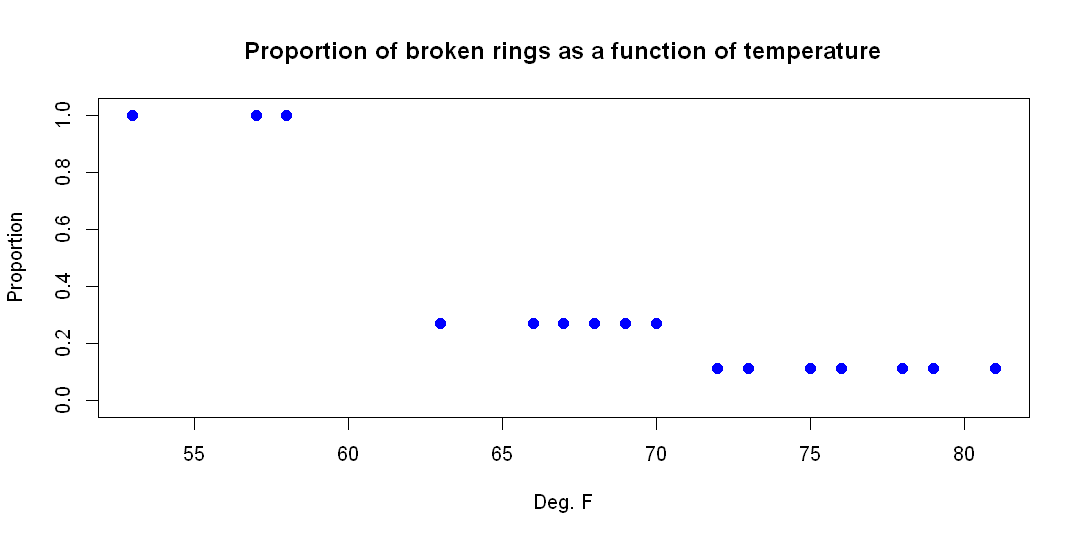

In [5]:
fi<-ifelse(ni==0,0,Fi/ni)
round(fi,2)
yi<-round(rep(fi,ni),2)
options(repr.plot.width=9.0,repr.plot.height=4.5)
plot(x,yi,pch=19,col="blue",cex=1.2,xlab="Deg. F",ylim=c(-0.02,1.02),ylab="Proportion",
     main="Proportion of broken rings as a function of temperature")

# 1. Frequentist logistic regression

$$
	\operatorname{P}(Y_{i} = 1\,|\,x_{i}) \equiv p(x_{i}) =\operatorname{Logistic}(\alpha+\beta\,x_{i})
	=\dfrac{\exp(\alpha+\beta\,x_{i})}{1+\exp(\alpha+\beta\,x_{i})},
$$

using the `glm` function in the `stats` package, obtaining the classic MLE's for $\alpha$ and $\beta$, along with their standard errors.

$$
    Y_{i}\sim\operatorname{Bernoulli}(p_{i}),\mskip30mu\text{where }p_{i}\equiv 
    p(x_{i})=\operatorname{Logistic}(a+b\,x_{i}),\mskip30mu 1\leq i\leq n.
$$

According to the model these observations are assumed to be independent, but they are NOT identically distributed: each Bernoulli observation has its own probability parameter, a linear function of the corresponding $x_{i}$. The ikelihood function is the product of $n$ factors, one for each observation:

$$
    \cal{L}(a,b,\mathbf{y})=\prod_{i=1}^{n}\cal{L}_{i},\mskip30mu\operatorname{ where }\mskip8mu
    \cal{L}_{i}\equiv\cal{L}_{i}(a,b,y_{i})=p_{i}^{y_{i}}\cdot(1-p_{i})^{(1-y_{i})},\mskip30mu 1\leq i\leq n.
$$

The log-likelihood is:

$$
    \ell=\log\cal{L}(a,b,\mathbf{y})=\sum_{i=1}^{n}
    \left[y_{i}\cdot\log p_{i}+(1-y_{i})\cdot\log (1-p_{i})\right],\mskip30mu\operatorname{where }\mskip8mu
    p_{i}\equiv p(x_{i})=\operatorname{Logistic}(a+b\,x_{i}).
$$

In the classical approach we find the ML estimates $\hat{a}$ and $\hat{b}$ of parameters $a$ and $b$.  With them we have the ML estimate $\hat{p}$ of $p$.

The _deviance_ is:

$$
    D=-2\cdot\log\cal{L}.
$$

In the (over)simplified _null model_ with $b=0$, observations are i.i.d., with $p_{i}=p$, $1\leq i\leq n$, and the ML estimator of $p$ is the relative frequency:

$$
    \hat{p}_{0}=f=\frac{n_{1}}{n}=0.304.
$$


For this null model, the deviance is:

$$
    D_{0}=-2\cdot\log\cal{L}_{0}=28.267.
$$

The complete model, with $a$ and $b$, is fitted with the `glm` function. See the listing. Notice, in particular, how the deviance decreases, from the $D_{0}$ value to the fitted model value  $D=20.315$.

In [6]:
#
# The logistic function and its inverse, the logit function (naive version)
# A more robust, overflow/underflow- concerned version is advisable.
#
Logistic<-function(z){exp(z)/(1+exp(z))}
logit<-function(t){log(t/(1-t))}

### ML estimation of alpha in the null model (with only the intercept term, and `beta`=0)

In [7]:
a0.hat<-logit(f)
round(a0.hat,3)

[1] -0.827

In [8]:
#
# Likelihood function 
#
Lik<-function(a,b){
    p<-Logistic(a+b*x)
    return(prod(p^y*(1-p)^(1-y)))
    }
#
# Log-Likelihood function - Naive version, using the literal definition of Logistic
#
LogLik.0<-function(a,b){
    eta<-a+b*x
    logp<- eta-log(1+exp(eta))
    logq<- -log(1+exp(eta))
    LL<-sum(logp[y==1])+sum(logq[y==0])
    return(LL)
    }
#
# Log-Likelihood function - Numerically aware version, borrowed from the mcmc package demo.
# Here the log1p function, defined as log1p(x)=log(1+x), is used.
#
LogLik.1<- function(a,b){
    eta<-a+b*x
    logp<-ifelse(eta < 0, eta - log1p(exp(eta)), - log1p(exp(- eta)))
    logq<-ifelse(eta < 0, - log1p(exp(eta)), - eta - log1p(exp(- eta)))
    LL  <-sum(logp[y == 1]) + sum(logq[y == 0])
    return(LL)
    }

In [9]:
#
# Null deviance: by definition, -2*LogLik(a0.hat,0)
# This quantity is used for comparison with the model with b, see below.
#
Null.deviance<--2*LogLik.0(a0.hat,0)
round(Null.deviance,3)

[1] 28.267

## Frequentist logistic regression with the `glm` function

In [10]:
challenger.glm.01<-glm(y~x,family=binomial)
challenger.glm.01.summary<-summary(challenger.glm.01)
challenger.glm.01.summary


Call:
glm(formula = y ~ x, family = binomial)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  15.0429     7.3786   2.039   0.0415 *
x            -0.2322     0.1082  -2.145   0.0320 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 28.267  on 22  degrees of freedom
Residual deviance: 20.315  on 21  degrees of freedom
AIC: 24.315

Number of Fisher Scoring iterations: 5


In [11]:
# Reproduce 'by hand' the computation of the "Residual deviance"
Reg.coef<-coef(challenger.glm.01)
round(Reg.coef,3)
Residual.deviance<--2*LogLik.0(Reg.coef[1],Reg.coef[2])
round(Residual.deviance,3)

(Intercept)           x 
     15.043      -0.232

[1] 20.315

#### Akaike's Information Criterion (AIC) and Bayesian Information Criterion (BIC)

$$
    \operatorname{AIC} = -2\cdot\log{\cal{L}}\text{(fitted.model)} + k\cdot p= \text{Residual deviance} + k\cdot p,
$$

Where $k=2$ and $p=$ number of parameters in the model. A related quantity is:

$$
     \operatorname{BIC} = -2\cdot\log{\cal{L}}\text{(fitted.model)} + \log n\cdot p= \text{Residual deviance}+ \log n\cdot p.
$$

In [12]:
AIC.challenger.glm.01<-Residual.deviance + 2 * 2
round(AIC.challenger.glm.01,4)
BIC.challenger.glm.01<-Residual.deviance + log(n) * 2
round(BIC.challenger.glm.01,4)
# There is an AIC()  and a BIC() function
round(AIC(challenger.glm.01),4)
round(BIC(challenger.glm.01),4)

[1] 24.3152

[1] 26.5862

[1] 24.3152

[1] 26.5862

In [13]:
vcov(challenger.glm.01)

,(Intercept),x
(Intercept),54.4441826,-0.79638547
x,-0.7963855,0.01171512


### Predicted probability of rupture as a (continuous) function of temperature

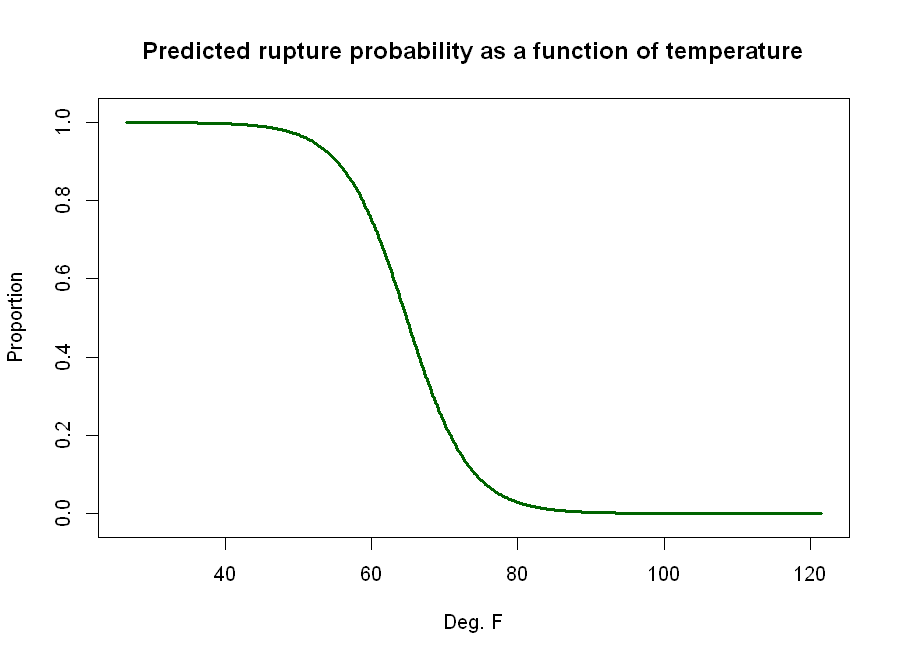

In [14]:
# Use 'predict' function for a grid of points on the observed temperature range
MM<-500
xx<-seq(x.min*0.5,x.max*1.5,length=MM)
yy<-predict(challenger.glm.01,newdata=data.frame(x=xx),type="response")
options(repr.plot.width=7.5,repr.plot.height=5.5)
plot(xx,yy,type="l",col="DarkGreen",lwd=3.0,xlab="Deg. F",ylim=c(-0.02,1.02),ylab="Proportion",
    main="Predicted rupture probability as a function of temperature")

### Compare residual deviance of `glm.01` and the null model

In [15]:
anova(challenger.glm.01)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,22,28.26715
x,1,7.95196,21,20.31519


# 2. Bayesian logistic regression with JAGS

In [16]:
#install.packages("R2jags",dependencies=TRUE,repos="https://cloud.r-project.org")
require(R2jags,quietly=TRUE)

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




In [17]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)
color_scheme_set("brightblue")

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [18]:
n<-length(y)
X<-cbind(rep(1,n),x) # build by hand the model matrix
#X

Each of the $n$ observed responses $y_{i}$ ($1\leq i\leq n$) is assumed to be drawn from a Bernoulli distribution with probability $p_{i}$, themselves determined by the linear predictor ($\eta_{i}=\beta_{0}+x_{i}\cdot\beta$), $x_{i}\in\mathbb{R}^p$.   
In this case, $\beta_{0}$ represents the intercept and $\beta_{j}\in\mathbb{R}$ represents the rate of change in the odds-ratio of $y$ for every unit change in the $j$-th effect $x_{j}$ ($1\leq j\leq p$).

For this simple model, we will go with zero-centered Gaussian (normal) priors with relatively large standard deviations for both intercept and treatment effects and a uniform for the standard deviation. 
 
$$
\begin{array}{lcl}
        y_{i}           &\sim &\operatorname{Bernoulli}(p_{i}),\\
        \eta_{i}        &=    &\beta_{0}+x_{i}\cdot\beta,\mskip66mu 1\leq i\leq n.\\
        \beta_{0}       &\sim &\operatorname{N}(0,1.0E-6), \mskip40mu 1.0E-6 \mskip10mu\text{is the precision.}\\
        \beta_{j}       &\sim &\operatorname{N}(0,1.0E-6),\mskip40mu 1\leq j\leq p.
\end{array}
$$

In [19]:
challenger.data <- list(y=y,n=n,logn=log(n),x=x)

In [20]:
cat("
model{
    # Priors
    b0~dnorm(0,1.0e-6)
    b1~dnorm(0,1.0e-6)

    # Likelihood
    for (i in 1:n){
        y[i] ~ dbern(p[i])
        #logit(p[i]) <- eta[i]
       
        # logit(p[i]) <- max(-20,min(20,eta[i])) used to avoid numerical instabilities
        p[i] <- 1/(1+exp(-eta[i])) # can use for logit(p[i]) above
        
        eta[i] <- b0+b1*x[i]
        LLi[i] <- y[i] * log(p[i]) + (1 - y[i]) * log(1 - p[i])
    }

    LogL <- sum(LLi[1:n])
    Deviance <- -2 * LogL            # Compute 'Deviance' by hand, to compare with JAGS-computed 'deviance'
    AIC <- -2 * LogL + 2 * 2
    BIC <- -2 * LogL + logn * 2
}
",file="challenger.jag")

In [21]:
# Initial parameter values
inits <- function () {
    list(b0 = rnorm(1, 0, 0.1),b1=rnorm(1,0,0.1)) }

In [22]:
params <- c("b0", "b1", "LogL", "AIC", "BIC", "Deviance")

In [23]:
challenger.jags.01 <- jags(data = challenger.data,
             inits = inits,
             parameters = params,
             model.file = "challenger.jag",
             n.thin = 1,
             n.chains = 3,
             n.burnin = 10000,
             n.iter = 30000)

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 23
   Unobserved stochastic nodes: 2
   Total graph size: 262

Initializing model



In [24]:
print(challenger.jags.01, intervals=c(0.025, 0.975), digits=3)

Inference for Bugs model at "challenger.jag", fit using jags,
 3 chains, each with 30000 iterations (first 10000 discarded)
 n.sims = 60000 iterations saved
         mu.vect sd.vect    2.5%   97.5%  Rhat n.eff
AIC       26.402   2.066  24.370  31.920 1.026   150
BIC       28.673   2.066  26.641  34.191 1.026   150
Deviance  22.402   2.066  20.370  27.920 1.025   150
LogL     -11.201   1.033 -13.960 -10.185 1.029   150
b0        19.082   8.269   5.148  37.892 1.051    63
b1        -0.292   0.121  -0.569  -0.088 1.052    63
deviance  22.402   2.066  20.370  27.920 1.025   150

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 2.1 and DIC = 24.5
DIC is an estimate of expected predictive error (lower deviance is better).


In [25]:
challenger.jags.01.mcmc<-as.mcmc(challenger.jags.01)

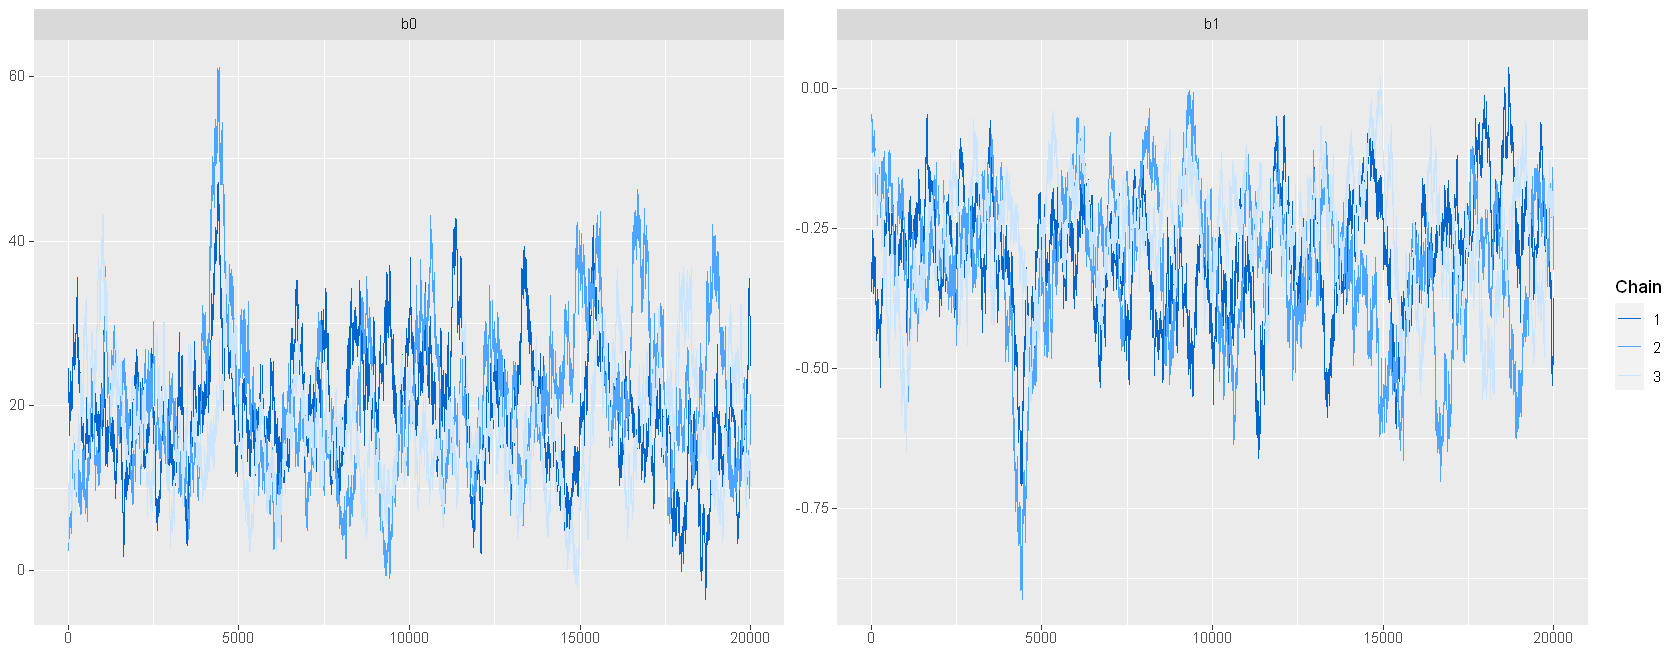

In [26]:
options(repr.plot.width=14,repr.plot.height=5.5)
mcmc_trace(challenger.jags.01.mcmc,pars=c("b0","b1"))

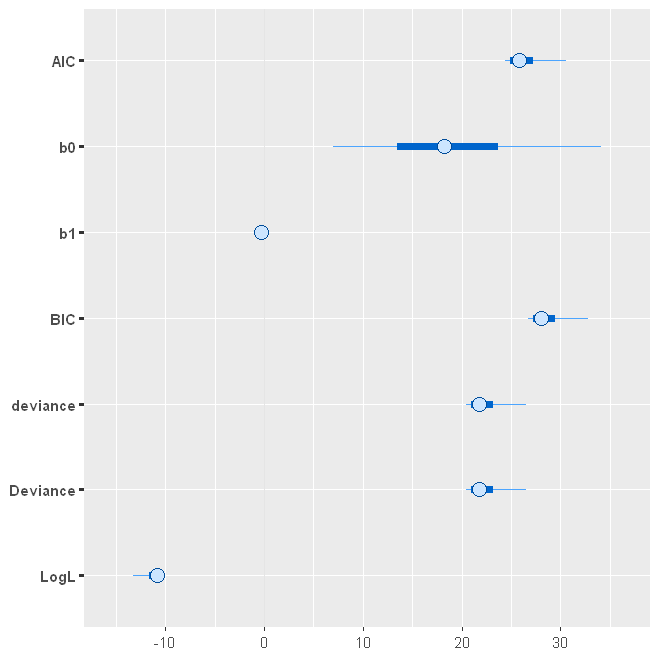

In [27]:
options(repr.plot.width=5.5,repr.plot.height=5.5)
mcmc_intervals(challenger.jags.01.mcmc)

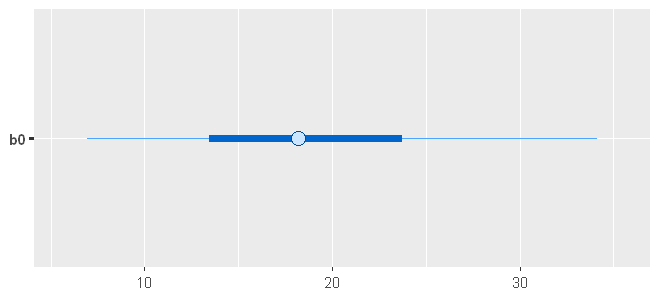

In [28]:
options(repr.plot.width=5.5,repr.plot.height=2.5)
mcmc_intervals(challenger.jags.01.mcmc,pars="b0")

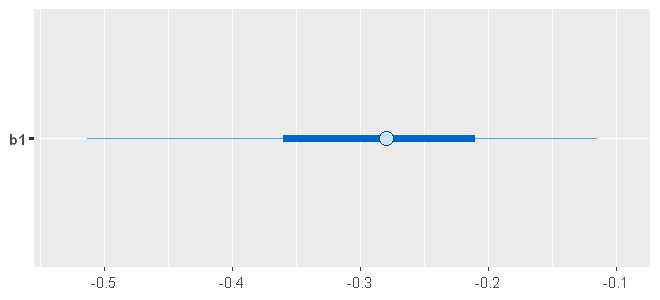

In [29]:
options(repr.plot.width=5.5,repr.plot.height=2.5)
# mcmc_intervals(challenger.Bglm.01,,pars="(Intercept)",cex=1.5) #cex does not work
mcmc_intervals(challenger.jags.01.mcmc,pars="b1")

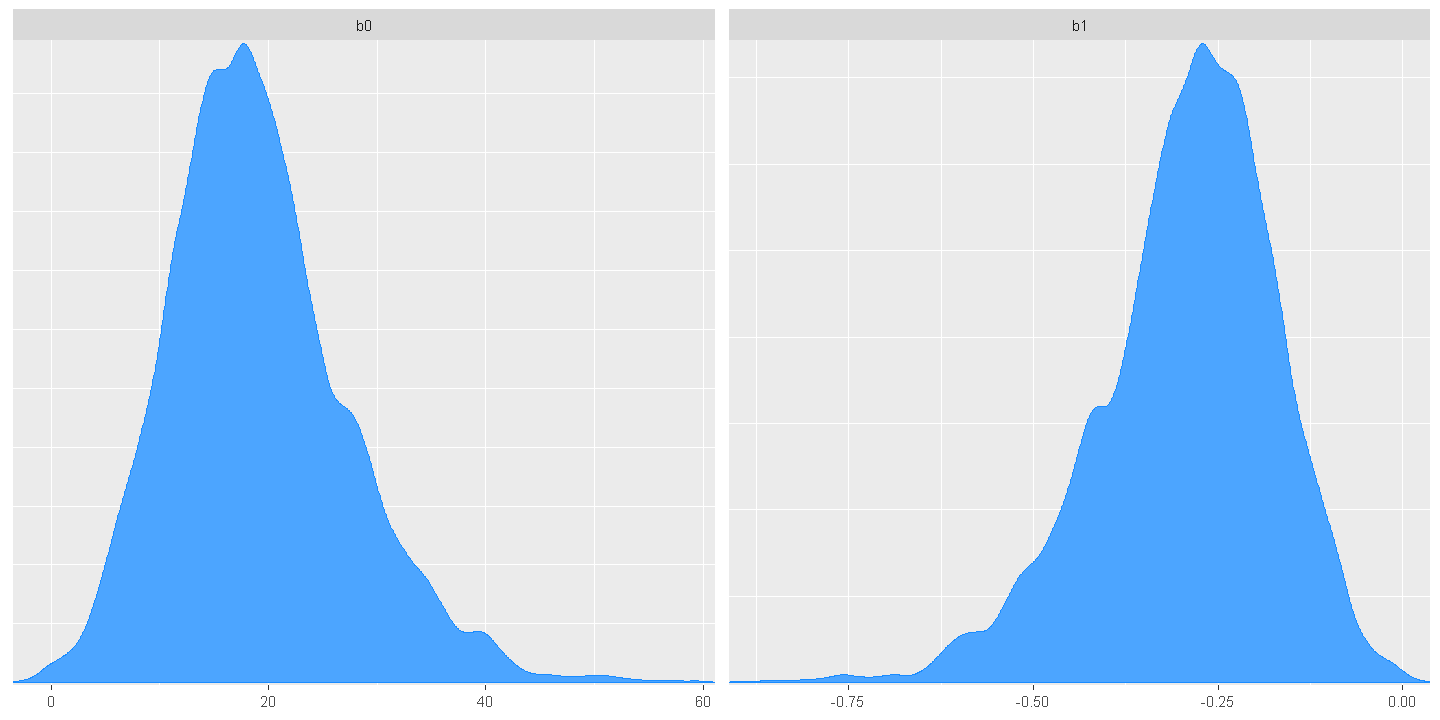

In [30]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_dens(challenger.jags.01.mcmc,pars=c("b0","b1"))

# 3. Bayesian logistic regression with Stan

In [31]:
#install.packages("rstan",dependencies=TRUE,repos= "https://cloud.r-project.org")
options(mc.cores = parallel::detectCores())
require(rstan)
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=corei7 -mtune=corei7')

Loading required package: rstan

Loading required package: StanHeaders


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file


Attaching package: 'rstan'


The following object is masked from 'package:R2jags':

    traceplot


The following object is masked from 'package:coda':

    traceplot




In [32]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)
color_scheme_set("brightblue")

In [33]:
challenger.stan.01a.model.string<-"
data {
  int<lower=0> n;
  vector[n] x;
  int<lower=0,upper=1> y[n];
}
parameters {
  real b0;
  real b1;
}
model {
  y ~ bernoulli_logit(b0 + b1 * x);
}"

In [34]:
# Translate model to C++ and compile to DSO:
challenger.stan.01a.stanDso <- stan_model(model_code=challenger.stan.01a.model.string) 

## MCMC sampling

In [35]:
challenger.stan.01a.data.list<-list(x=x,y=y,n=n)

In [36]:
# Generate posterior sample:
challenger.stan.01a<-sampling(challenger.stan.01a.stanDso,data=challenger.stan.01a.data.list, iter = 15000,
                         chains=3, verbose=FALSE, seed=101, warmup=4000)

In [37]:
print(challenger.stan.01a)

Inference for Stan model: anon_model.
3 chains, each with iter=15000; warmup=4000; thin=1; 
post-warmup draws per chain=11000, total post-warmup draws=33000.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
b0    19.02    0.13 8.82   5.19  12.74  17.80  24.04  39.78  4274    1
b1    -0.29    0.00 0.13  -0.60  -0.36  -0.27  -0.20  -0.09  4265    1
lp__ -11.24    0.02 1.08 -14.17 -11.64 -10.90 -10.47 -10.18  5124    1

Samples were drawn using NUTS(diag_e) at Sun May 21 18:07:13 2023.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


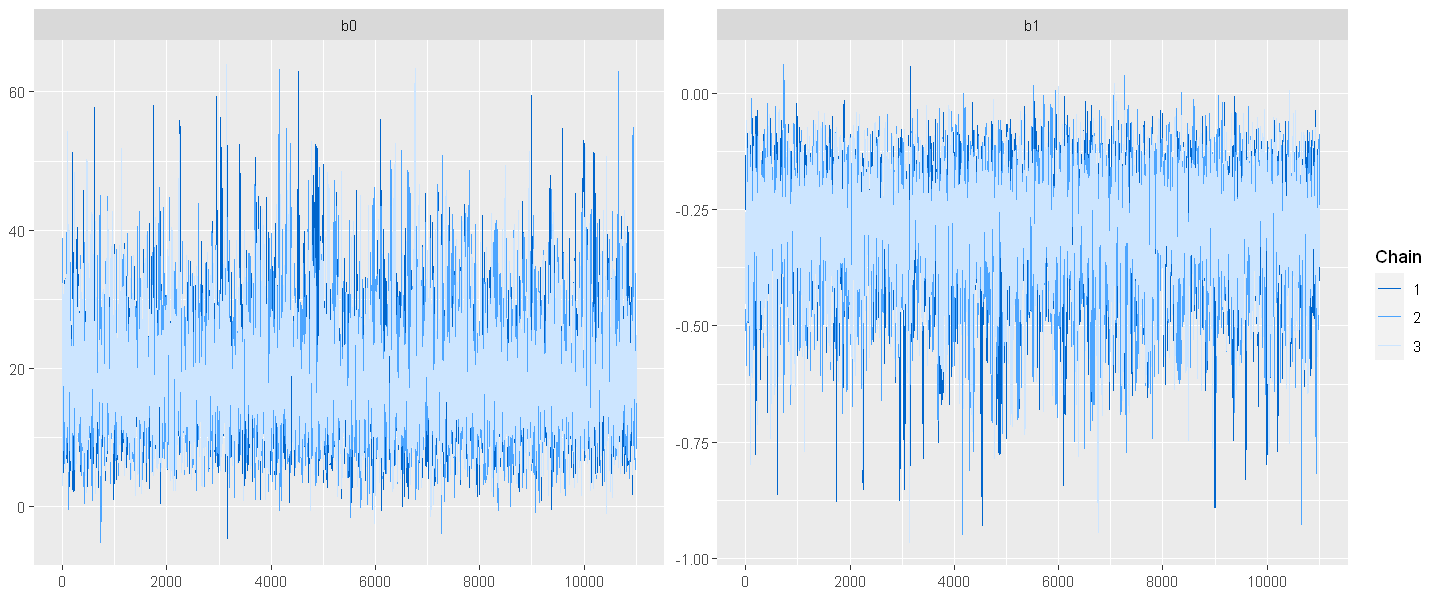

In [38]:
options(repr.plot.width=12,repr.plot.height=5)
mcmc_trace(challenger.stan.01a, pars=c("b0","b1"))

Warning message:
"The `facets` argument of `facet_grid()` is deprecated as of ggplot2 2.2.0.
ℹ Please use the `rows` argument instead.
ℹ The deprecated feature was likely used in the bayesplot package.
  Please report the issue at <https://github.com/stan-dev/bayesplot/issues/>."


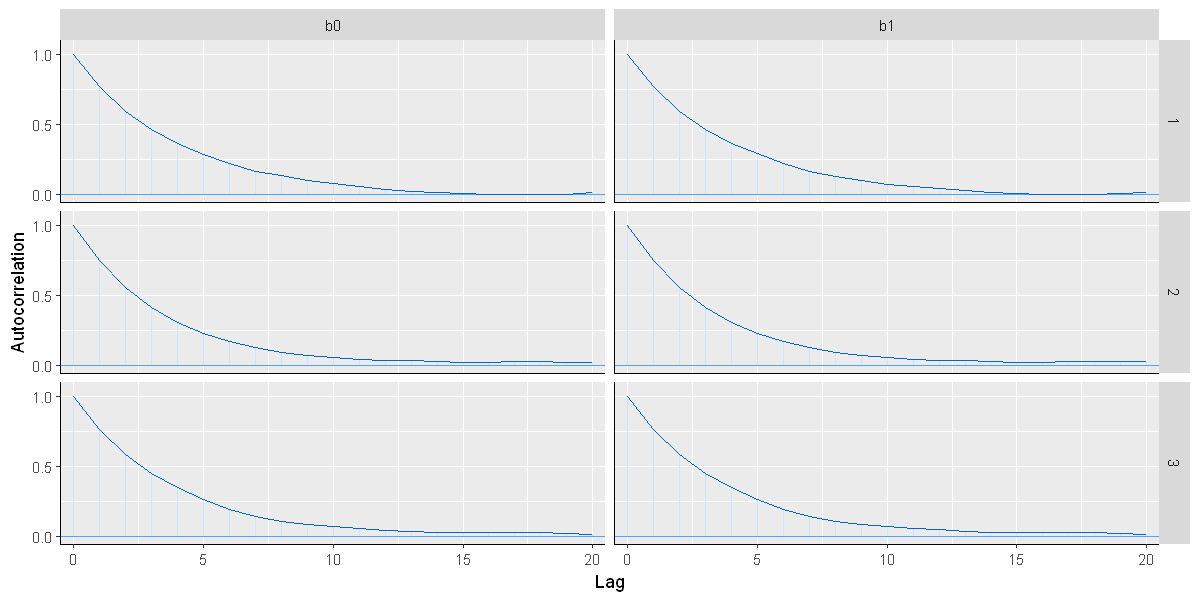

In [39]:
options(repr.plot.width=10, repr.plot.height=5)
mcmc_acf(challenger.stan.01a,pars=c("b0","b1"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


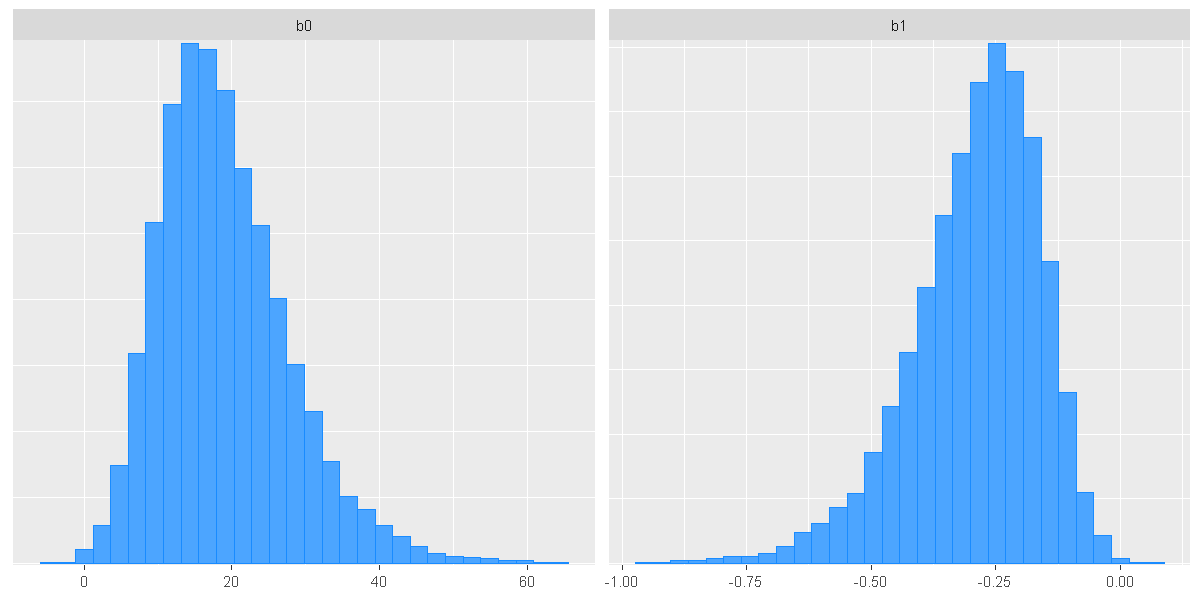

In [40]:
options(repr.plot.width=10,repr.plot.height=5)
mcmc_hist(challenger.stan.01a, pars=c("b0","b1"))

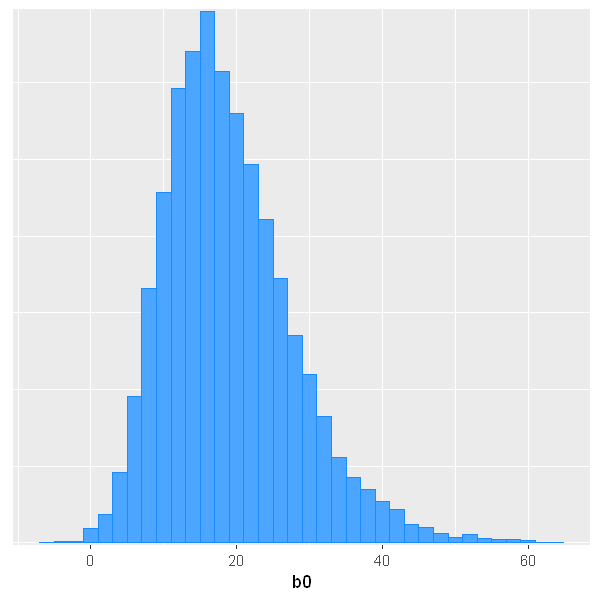

In [41]:
options(repr.plot.width=5,repr.plot.height=5)
mcmc_hist(challenger.stan.01a, pars="b0",binwidth=2)

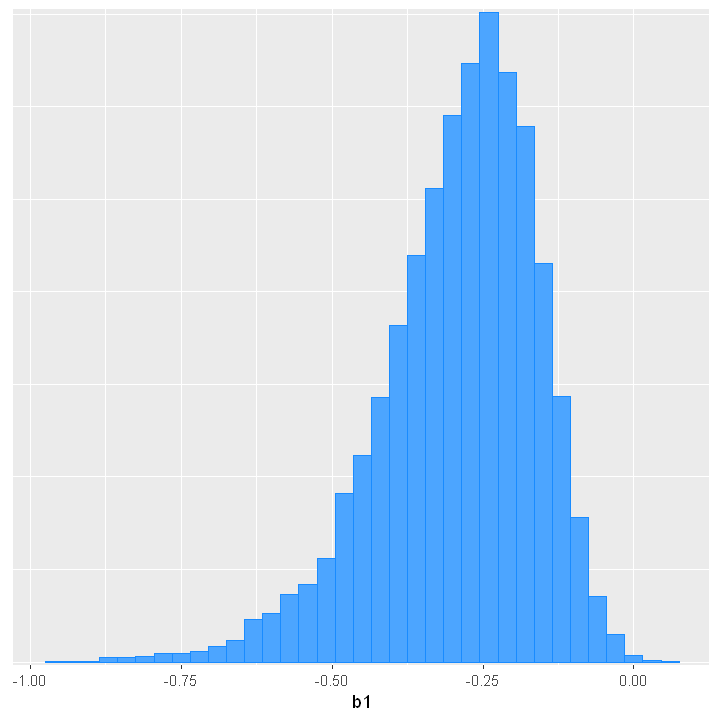

In [42]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_hist(challenger.stan.01a, pars="b1",binwidth=0.03)

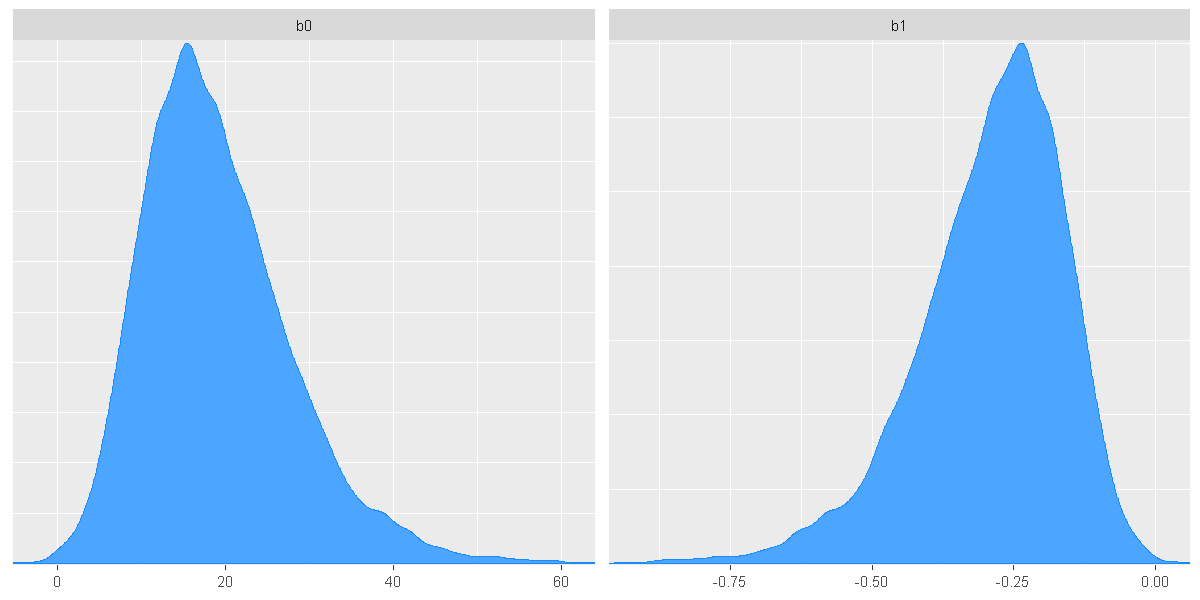

In [43]:
options(repr.plot.width=10,repr.plot.height=5)
mcmc_dens(challenger.stan.01a, pars=c("b0","b1"))

## Another syntax for the same model

Here the parameter is a 2-dim vector and the linear predictor is obtained as a matrix product X*b

In [44]:
challenger.stan.01b.model.string<-"
data {
   int<lower=0> n;
   matrix[n,2] X;
   int<lower=0,upper=1> y[n];
}
parameters {
   vector[2] b;
   }
model {
  y ~ bernoulli_logit(X*b);
}

generated quantities{
    
}

"

In [45]:
# Translate model to C++ and compile to DSO:
challenger.stan.01b.stanDso <- stan_model(model_code=challenger.stan.01b.model.string) 

## MCMC sampling

In [46]:
challenger.stan.01b.data.list<-list(X=cbind(rep(1,n),x),y=y,n=n)

In [47]:
# Generate posterior sample:
challenger.stan.01b<-sampling(challenger.stan.01b.stanDso,data=challenger.stan.01b.data.list, iter = 15000,
                         chains=3, verbose=FALSE, seed=101, warmup=4000)

In [48]:
print(challenger.stan.01b)

Inference for Stan model: anon_model.
3 chains, each with iter=15000; warmup=4000; thin=1; 
post-warmup draws per chain=11000, total post-warmup draws=33000.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
b[1]  18.82    0.14 8.84   4.69  12.71  17.71  23.78  39.50  3830    1
b[2]  -0.29    0.00 0.13  -0.59  -0.36  -0.27  -0.20  -0.08  3825    1
lp__ -11.25    0.02 1.09 -14.18 -11.68 -10.92 -10.47 -10.19  5049    1

Samples were drawn using NUTS(diag_e) at Sun May 21 18:07:59 2023.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


## A third version with posterior predictive pdf samples 

For the linear predictor and probability of rupture for a new dataset.

As this new dataset we choose a grid spanning the interval of observed temperatures.

In [49]:
N<-100
x.min<-min(x)
x.max<-max(x)
new.x<-cbind(rep(1,N),seq(x.min,x.max,length=N))     # Add the intercept column of ones

In [50]:
challenger.stan.01c.model.string<-"
data {
   int<lower=0> n;
   matrix[n,2] X;
   int<lower=0,upper=1> y[n];
   int<lower=1> N;      // number of new x 
   matrix[N,2] new_X;
   }
parameters {
   vector[2] b;
   }
model {
   y ~ bernoulli_logit(X*b);
   }

generated quantities{
   vector[N] Eta;
   vector[N] Prob;

   Eta=new_X*b;
   Prob=inv_logit(Eta);
   }
"

In [51]:
# Translate model to C++ and compile to DSO:
challenger.stan.01c.stanDso <- stan_model(model_code=challenger.stan.01c.model.string) 

## MCMC sampling

In [52]:
challenger.stan.01c.data.list<-list(X=cbind(rep(1,n),x),y=y,n=n,N=N,new_X=new.x)

In [53]:
# Generate posterior sample:
challenger.stan.01c<-sampling(challenger.stan.01c.stanDso,data=challenger.stan.01c.data.list, iter = 15000,
                         chains=3, verbose=FALSE, seed=101, warmup=4000)

In [54]:
print(challenger.stan.01c, pars="b")

Inference for Stan model: anon_model.
3 chains, each with iter=15000; warmup=4000; thin=1; 
post-warmup draws per chain=11000, total post-warmup draws=33000.

      mean se_mean   sd  2.5%   25%   50%   75% 97.5% n_eff Rhat
b[1] 18.82    0.14 8.84  4.69 12.71 17.71 23.78 39.50  3830    1
b[2] -0.29    0.00 0.13 -0.59 -0.36 -0.27 -0.20 -0.08  3825    1

Samples were drawn using NUTS(diag_e) at Sun May 21 18:08:42 2023.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [55]:
# extract Prob
Prob <- extract(challenger.stan.01c, 'Prob')$Prob
#str(Prob)
save(Prob,file="Challenger.sim.Prob.Rdata")

### Graphics for representing predicted posterior probabilities

Obtain MAP estimates for the probability at each temperature in the grid

In [56]:
MAP<-function(t){
    A<-density(t)
    return(A$x[which.max(A$y)])
}
Prob.MAP<-apply(Prob,2,MAP)
#str(Prob.MAP)

Generate a smooth curve from these points, using the "Supersmoother" function

In [57]:
xy<-supsmu(seq(x.min,x.max,length=N),Prob.MAP)  # Supersmoother
#str(xy)

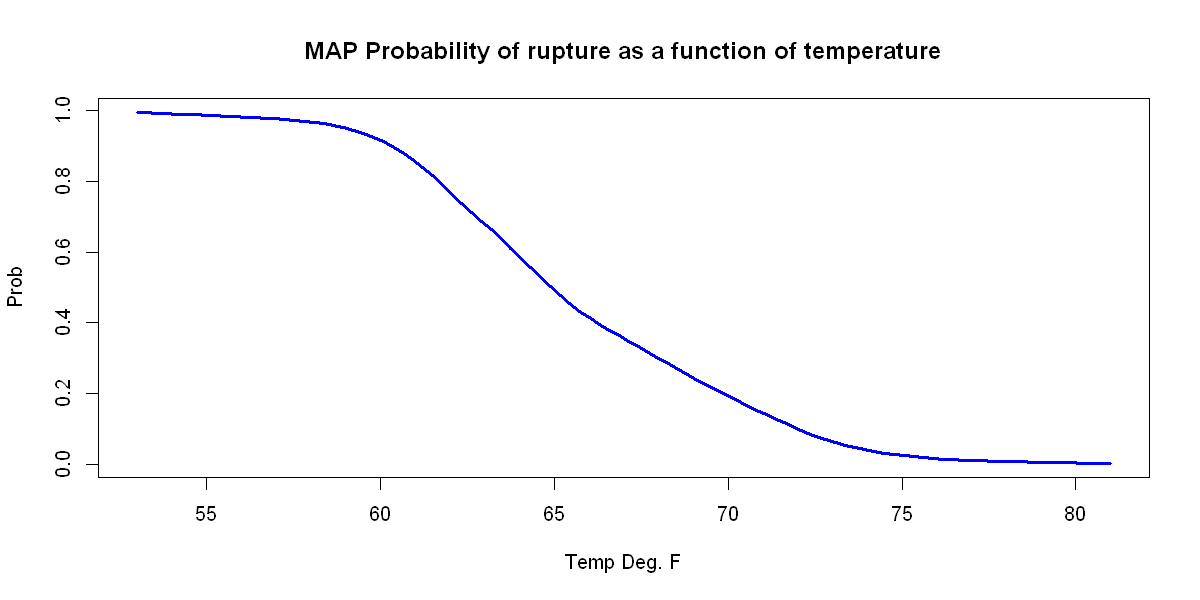

In [58]:
plot(xy$x,xy$y,"l",lwd=2.5,col="blue",
    xlab="Temp Deg. F",ylab="Prob",main="MAP Probability of rupture as a function of temperature")

#### Visualization of posterior pdfs for each temperature in the grid

In [59]:
Prob.df<-as.data.frame(Prob)
#str(Prob.df,list.len=3)
Prob.dens<-lapply(Prob.df,density)
#str(Prob.dens,list.len=3)
getx<-function(A){return(A$x)}
gety<-function(A){return(A$y)}
getbw<-function(A){return(A$bw)}
Prob.dens.x<-sapply(Prob.dens,getx)
Prob.dens.y<-sapply(Prob.dens,gety)
Prob.dens.bw<-sapply(Prob.dens,getbw)
Dens.min<-apply(Prob.dens.x,2,min)
Dens.max<-apply(Prob.dens.x,2,max)
Prob.dens.std<-as.matrix(scale(Prob.dens.y))
#str(Prob.dens.std)

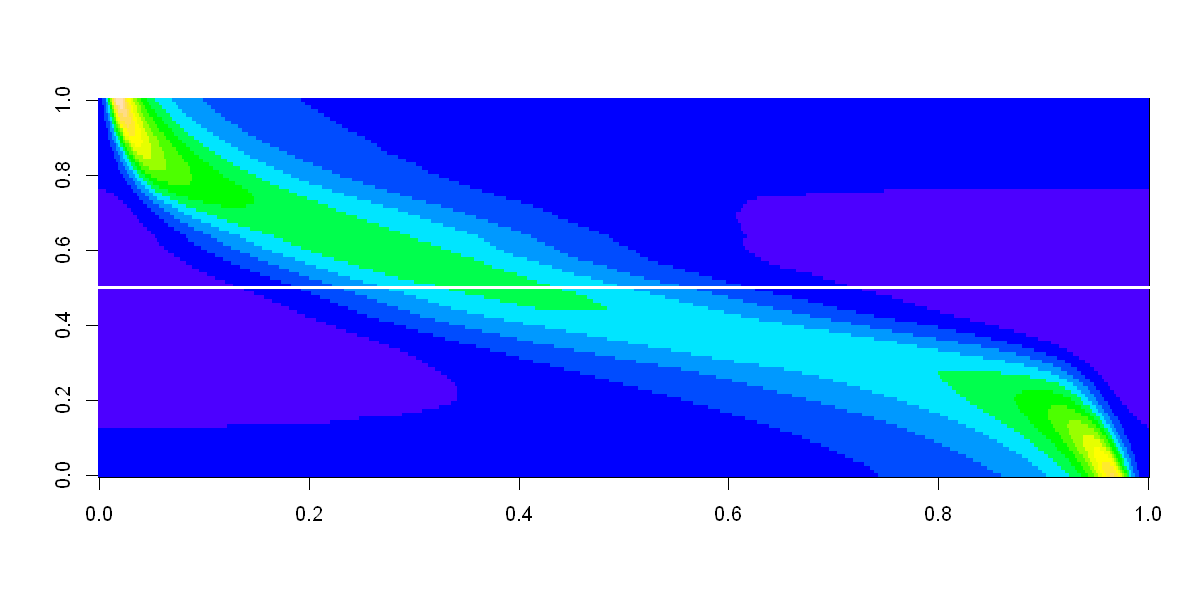

In [60]:
image(Prob.dens.std,col=topo.colors(15))
abline(h=0.5,lwd=3,col="white")

#### Visualization of posterior pdf quantiles for each temperature in the grid

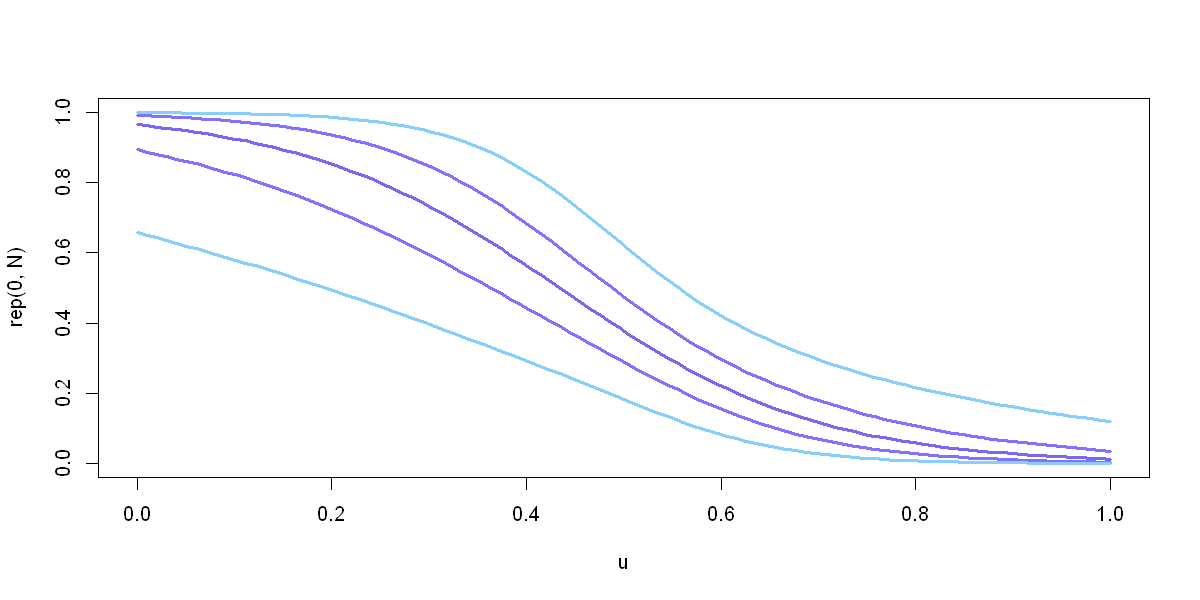

In [61]:
Qprobs<-c(0.05,0.25,0.5,0.75,0.95)
Quantiles<-function(A){quantile(A,probs=Qprobs)}
Qpost<-sapply(Prob.df,Quantiles)
#str(Qpost)
u<-seq(0,1,length=N)
plot(u,rep(0,N),type="n",ylim=c(0,1))
lines(supsmu(u,Qpost[3,]),lwd=3,col="MediumSlateBlue")
lines(supsmu(u,Qpost[2,]),lwd=3,col="LightSlateBlue")
lines(supsmu(u,Qpost[4,]),lwd=3,col="LightSlateBlue")
lines(supsmu(u,Qpost[1,]),lwd=3,col="LightSkyBlue")
lines(supsmu(u,Qpost[5,]),lwd=3,col="LightSkyBlue")

# 4. Bayesian logistic regression with Stan - ADVI Variational Inference

In [62]:
challenger.stan.01a.vb<-vb(challenger.stan.01a.stanDso,data=challenger.stan.01a.data.list,
                          algorithm='fullrank',
                          iter=15000,output_samples=2000,tol_rel_obj=0.01,adapt_iter=150)

Chain 1: ------------------------------------------------------------
Chain 1: EXPERIMENTAL ALGORITHM:
Chain 1:   This procedure has not been thoroughly tested and may be unstable
Chain 1:   or buggy. The interface is subject to change.
Chain 1: ------------------------------------------------------------
Chain 1: 
Chain 1: 
Chain 1: 
Chain 1: Gradient evaluation took 1.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Begin eta adaptation.
Chain 1: Iteration:   1 / 750 [  0%]  (Adaptation)
Chain 1: Iteration: 150 / 750 [ 20%]  (Adaptation)
Chain 1: Iteration: 300 / 750 [ 40%]  (Adaptation)
Chain 1: Iteration: 450 / 750 [ 60%]  (Adaptation)
Chain 1: Iteration: 600 / 750 [ 80%]  (Adaptation)
Chain 1: Iteration: 750 / 750 [100%]  (Adaptation)
Chain 1: Success! Found best value [eta = 0.1].
Chain 1: 
Chain 1: Begin stochastic gradient ascent.
Chain 1:   iter   

Warning message:
"Pareto k diagnostic value is 1.1. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead."


In [63]:
summary(challenger.stan.01a.vb)$summary

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,khat
b0,-1.94994791,NaN,2.38654186,-6.55525000,-3.57498500,-1.9508550,-0.33765375,2.76130500,NaN,1.309072
b1,0.01213137,NaN,0.03397295,-0.05411028,-0.01142678,0.0118432,0.03517398,0.07615129,NaN,1.101592
lp__,0.00000000,NaN,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,NaN,1.101329


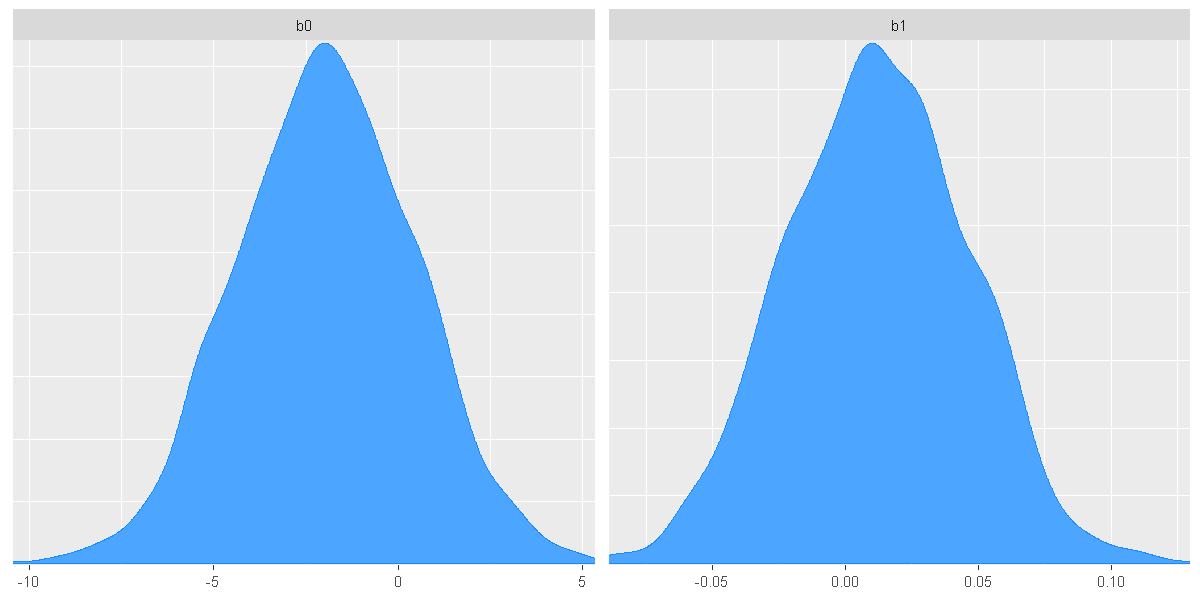

In [64]:
mcmc_dens(challenger.stan.01a.vb, pars=c("b0","b1"))

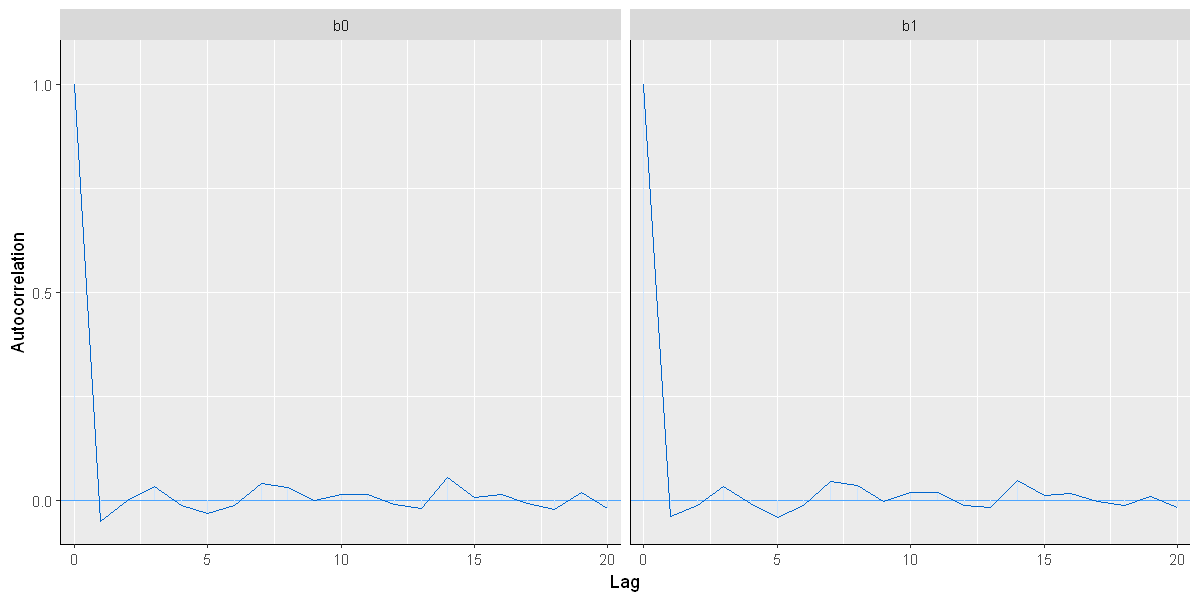

In [65]:
mcmc_acf(challenger.stan.01a.vb, pars=c("b0","b1")) # Check these are independent samples!!